In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df1=df.drop('Species',axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Unsupervised Learning

## K-Means Clustring

In [9]:
from sklearn.cluster import KMeans
wcss=[]

In [10]:
for k in range(1,15):
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(df1)
    wcss.append(Kmeans.inertia_)

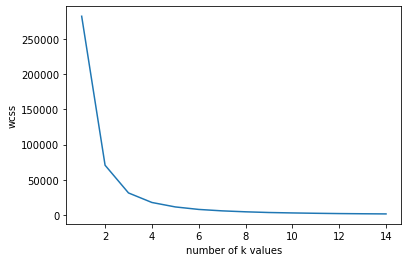

In [11]:
plt.plot(range(1,15),wcss)
plt.xlabel("number of k values")
plt.ylabel("wcss")
plt.show()

In [12]:
kmeans1=KMeans(n_clusters=3)
clusters=kmeans1.fit_predict(df1)
df1["label"]=clusters

In [13]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [14]:
df1["label"].unique()

array([0, 2, 1])

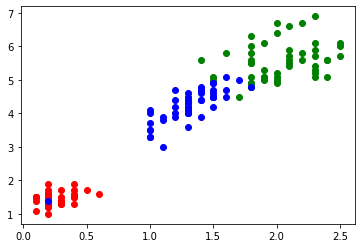

In [15]:
plt.scatter(df1.PetalWidthCm[df1.label==0],df1.PetalLengthCm[df1.label==0], color="red")
plt.scatter(df1.PetalWidthCm[df1.label==1],df1.PetalLengthCm[df1.label==1], color="green")
plt.scatter(df1.PetalWidthCm[df1.label==2],df1.PetalLengthCm[df1.label==2], color="blue")

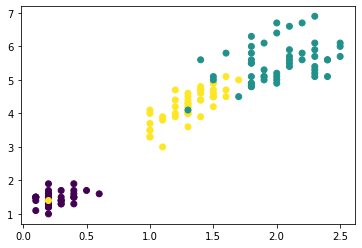

In [16]:
plt.scatter(x="PetalWidthCm",y="PetalLengthCm",c="label",data=df1)
plt.show()

## Hierarchical Clustering

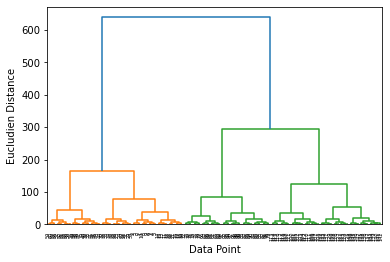

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg=linkage(df1,method="ward")
dendrogram(merg,leaf_rotation=90)

plt.xlabel("Data Point")
plt.ylabel("Eucludien Distance")
plt.show()

## Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
h_c = AgglomerativeClustering(n_clusters=3,linkage="ward")

cluster = h_c.fit_predict(df1)

df1["label"] = cluster

In [19]:
df1["label"].unique()

array([0, 2, 1], dtype=int64)

In [20]:
kmeans1.cluster_centers_[:,4]

array([0.24489796, 2.01176471, 1.304     ])

In [21]:
kmeans1.cluster_centers_[:,3]

array([1.46530612, 5.52352941, 4.206     ])

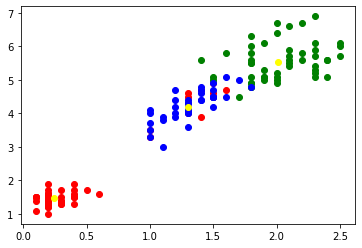

In [22]:
plt.scatter(df1.PetalWidthCm[df1.label==0],df1.PetalLengthCm[df1.label==0], color="red")
plt.scatter(df1.PetalWidthCm[df1.label==1],df1.PetalLengthCm[df1.label==1], color="green")
plt.scatter(df1.PetalWidthCm[df1.label==2],df1.PetalLengthCm[df1.label==2], color="blue")
plt.scatter(kmeans1.cluster_centers_[:,4],kmeans1.cluster_centers_[:,3], color="yellow")
plt.show()

## Cluster Success

In [23]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
Spices_Values=[]

for each in df.Species:
    
    if(each=="Iris-setosa"):
        Spices_Values.append(0)
        
    elif(each=="Iris-versicolor"):
        Spices_Values.append(2)
    
    else:
        Spices_Values.append(1)
        
df["Species"]=Spices_Values
#df.head()
        

In [25]:
df["Guess"] = cluster
#df.head()

In [26]:
p=df.shape[0]
Success = []
for i in np.arange(p):
    if( df.loc[i,"Species"] == df.loc[i,"Guess"]):
        Success.append(1)
    else:
        Success.append(0)
        
df["Success"]=Success
#df

In [27]:
pred=(df["Success"].sum()/df.shape[0])*100
round_pred=round(pred,2)

In [28]:
print(f"Cluster Success : {round_pred} %")

Cluster Success : 92.67 %
